In [1]:

# https://github.com/timestocome


# Lovecraft Corpus
# https://github.com/vilmibm/lovecraftcorpus

# Gensim QuickStart
# https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/gensim%20Quick%20Start.ipynb



# meh, not sure if corpus too small, too many one-offs, or too many dims lost in plot
# hopefully will work better in models
# will try to make another pass on this when time allows

In [2]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt

In [3]:
# silence is golden

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action="ignore",category=DeprecationWarning)
warnings.filterwarnings(action="ignore",category=FutureWarning)


In [4]:
# import modules & set up logging
import gensim, logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [5]:
# list all files under the input directory
# this is the corpus
import os

fNames = []
for dirname, _, filenames in os.walk('lovecraftcorpus'):
    for filename in filenames:
        fNames.append(os.path.join(dirname, filename))

print(fNames)
print(len(fNames))

train_files = fNames

['lovecraftcorpus/beyond_wall_of_sleep.txt', 'lovecraftcorpus/tomb.txt', 'lovecraftcorpus/polaris.txt', 'lovecraftcorpus/moon_bog.txt', 'lovecraftcorpus/pharoahs.txt', 'lovecraftcorpus/nameless.txt', 'lovecraftcorpus/colour_out_of_space.txt', 'lovecraftcorpus/dagon.txt', 'lovecraftcorpus/hypnos.txt', 'lovecraftcorpus/silver_key.txt', 'lovecraftcorpus/lurking_fear.txt', 'lovecraftcorpus/book.txt', 'lovecraftcorpus/terrible_old_man.txt', 'lovecraftcorpus/tree.txt', 'lovecraftcorpus/juan_romero.txt', 'lovecraftcorpus/reanimator.txt', 'lovecraftcorpus/hound.txt', 'lovecraftcorpus/cthulhu.txt', 'lovecraftcorpus/rats_walls.txt', 'lovecraftcorpus/ex_oblivione.txt', 'lovecraftcorpus/medusas_coil.txt', 'lovecraftcorpus/descendent.txt', 'lovecraftcorpus/shadow_out_of_time.txt', 'lovecraftcorpus/temple.txt', 'lovecraftcorpus/cool_air.txt', 'lovecraftcorpus/kadath.txt', 'lovecraftcorpus/dunwich.txt', 'lovecraftcorpus/shunned_house.txt', 'lovecraftcorpus/alchemist.txt', 'lovecraftcorpus/iranon.txt'

In [6]:
# read in files and split into sentences of words

class MyText(object):
    def __iter__(self):
        for f in train_files:
            for line in open(f):
                # assume there's one document per line, tokens separated by whitespace
                yield line.lower().split()

sentences = MyText()

print(sentences)

In [7]:
# default value of min_count=5
# dump words occuring less than min_count
model = gensim.models.Word2Vec(sentences, min_count=1)

2019-10-20 15:42:09,588 : INFO : collecting all words and their counts
2019-10-20 15:42:09,589 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-10-20 15:42:09,673 : INFO : collected 45878 word types from a corpus of 499034 raw words and 8630 sentences
2019-10-20 15:42:09,673 : INFO : Loading a fresh vocabulary
2019-10-20 15:42:09,744 : INFO : effective_min_count=1 retains 45878 unique words (100% of original 45878, drops 0)
2019-10-20 15:42:09,744 : INFO : effective_min_count=1 leaves 499034 word corpus (100% of original 499034, drops 0)
2019-10-20 15:42:09,811 : INFO : deleting the raw counts dictionary of 45878 items
2019-10-20 15:42:09,812 : INFO : sample=0.001 downsamples 38 most-common words
2019-10-20 15:42:09,812 : INFO : downsampling leaves estimated 376549 word corpus (75.5% of prior 499034)
2019-10-20 15:42:09,869 : INFO : estimated required memory for 45878 words and 100 dimensions: 59641400 bytes
2019-10-20 15:42:09,869 : INFO : resetting laye

In [8]:
# sentences, n_cores to use

model = gensim.models.Word2Vec(sentences, workers=4)

2019-10-20 15:42:11,281 : INFO : collecting all words and their counts
2019-10-20 15:42:11,282 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-10-20 15:42:11,368 : INFO : collected 45878 word types from a corpus of 499034 raw words and 8630 sentences
2019-10-20 15:42:11,368 : INFO : Loading a fresh vocabulary
2019-10-20 15:42:11,384 : INFO : effective_min_count=5 retains 9244 unique words (20% of original 45878, drops 36634)
2019-10-20 15:42:11,384 : INFO : effective_min_count=5 leaves 443879 word corpus (88% of original 499034, drops 55155)
2019-10-20 15:42:11,403 : INFO : deleting the raw counts dictionary of 45878 items
2019-10-20 15:42:11,404 : INFO : sample=0.001 downsamples 45 most-common words
2019-10-20 15:42:11,404 : INFO : downsampling leaves estimated 315847 word corpus (71.2% of prior 443879)
2019-10-20 15:42:11,419 : INFO : estimated required memory for 9244 words and 100 dimensions: 12017200 bytes
2019-10-20 15:42:11,419 : INFO : resetting 

In [9]:
from tempfile import mkstemp

fs, temp_path = mkstemp("gensim_temp")  # creates a temp file

model.save(temp_path)  # save the model

2019-10-20 15:42:12,383 : INFO : saving Word2Vec object under /tmp/tmpz7b3taxugensim_temp, separately None
2019-10-20 15:42:12,384 : INFO : not storing attribute vectors_norm
2019-10-20 15:42:12,384 : INFO : not storing attribute cum_table
2019-10-20 15:42:12,458 : INFO : saved /tmp/tmpz7b3taxugensim_temp


In [10]:
# load saved model

new_model = gensim.models.Word2Vec.load(temp_path)  # open the model


2019-10-20 15:42:12,461 : INFO : loading Word2Vec object from /tmp/tmpz7b3taxugensim_temp
2019-10-20 15:42:12,503 : INFO : loading wv recursively from /tmp/tmpz7b3taxugensim_temp.wv.* with mmap=None
2019-10-20 15:42:12,504 : INFO : setting ignored attribute vectors_norm to None
2019-10-20 15:42:12,504 : INFO : loading vocabulary recursively from /tmp/tmpz7b3taxugensim_temp.vocabulary.* with mmap=None
2019-10-20 15:42:12,504 : INFO : loading trainables recursively from /tmp/tmpz7b3taxugensim_temp.trainables.* with mmap=None
2019-10-20 15:42:12,505 : INFO : setting ignored attribute cum_table to None
2019-10-20 15:42:12,505 : INFO : loaded /tmp/tmpz7b3taxugensim_temp


In [35]:
# visualize embeddings

from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling


import matplotlib.pyplot as plt



def reduce_dimensions(model, plot_in_notebook = True):

    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    vectors = []        # positions in vector space
    labels = []         # keep track of words to label our data again later
    for word in model.wv.vocab:
        vectors.append(model[word])
        labels.append(word)


    # convert both lists into numpy vectors for reduction
    vectors = np.asarray(vectors)
    labels = np.asarray(labels)
    
    # reduce using t-SNE
    vectors = np.asarray(vectors)
    logging.info('starting tSNE dimensionality reduction. This may take some time.')
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    
    print(len(vectors))
    x = [v[0] for v in vectors][100:200]
    y = [v[1] for v in vectors][100:200]
    labels = labels[100:200]
        
    


    font = {'family' : 'sans-serif',
            'weight' : 'normal',
            'size'   : 13}

    plt.rc('font', **font)

    fig, ax = plt.subplots(figsize=(16,16))
    ax.scatter(x, y)

    # label points
    for i, txt in enumerate(labels):
        ax.annotate(txt, (x[i], y[i]))


    plt.title('Similarity of Lovecraft Stories')

    plt.show()



2019-10-20 16:08:48,008 : INFO : starting tSNE dimensionality reduction. This may take some time.


9244


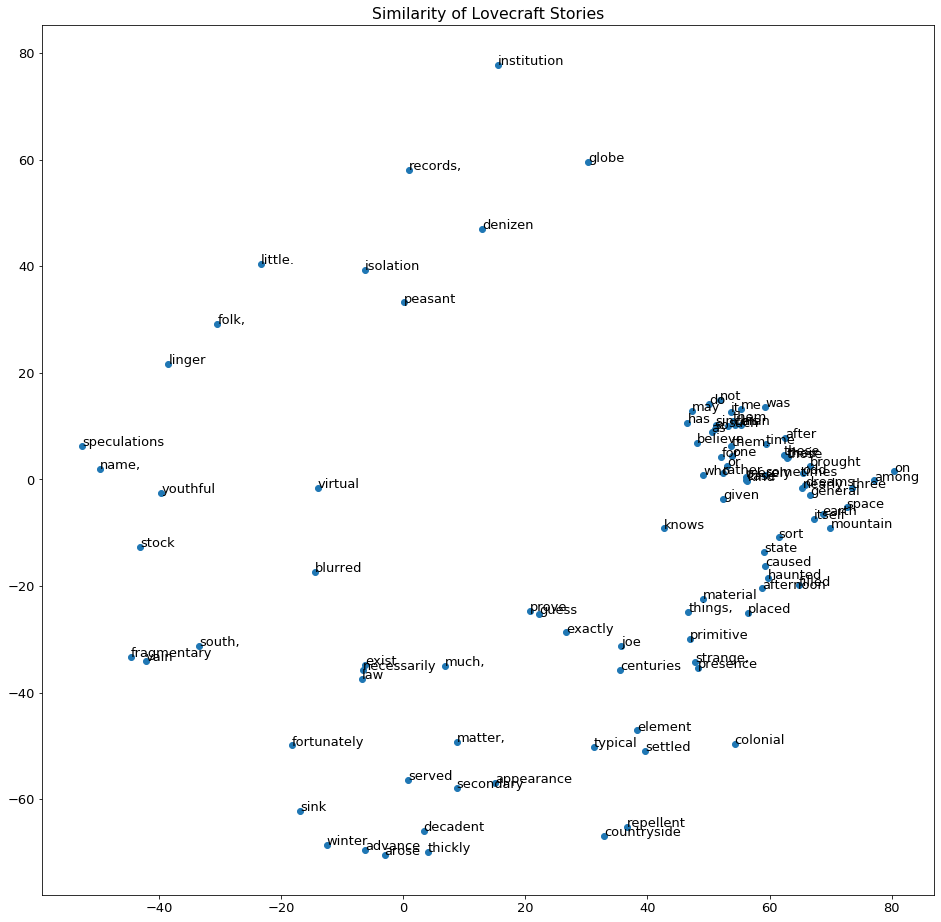

In [36]:
reduce_dimensions(model)
